In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df=pd.read_csv('./North_American_Superstore.csv',encoding='gbk')


## 1.对导入数据的columns中存在空格的列进行重命名

In [3]:
#将原始数据中的columns中存在的空格列进行重命名
df.rename(columns=lambda x:x.replace(' ',''),inplace=True)

In [4]:
df.shape


(9994, 21)

In [5]:
df.head()


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## 1.1 数据预处理


### 1.1.1 查看整体数据信息

In [6]:
df.describe()



,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9983 non-null   float64
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

### 1.1.2 数据去重


In [8]:
df.drop_duplicates(inplace=True)





In [9]:
df.shape()

TypeError: 'tuple' object is not callable

In [10]:
df.shape



(9994, 21)

### 1.1.3对数值明显异常的数据进行剔除


In [11]:
df.loc[df['Sales']<0].Sales.count()#统计销售额SALES<0的个数
df.loc[df['Sales']<0,['OrderID','CustomerID','Sales']]
df=df.loc[(df['Sales']>0)&(df['Quantity']>0)]

### 1.4如果存在缺失值考虑进行填充或者删除整行数据

In [12]:
df.isnull().sum()

RowID            0
OrderID          0
OrderDate        0
ShipDate         0
ShipMode         0
CustomerID       0
CustomerName     0
Segment          0
Country          0
City             0
State            0
PostalCode      11
Region           0
ProductID        0
Category         0
Sub-Category     0
ProductName      0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df=df.loc[~df.PostalCode.isnull()]

In [15]:
df.isnull().sum()

RowID           0
OrderID         0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
CustomerName    0
Segment         0
Country         0
City            0
State           0
PostalCode      0
Region          0
ProductID       0
Category        0
Sub-Category    0
ProductName     0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### 1.5将刚导入DateFrame中的日期从字符串str格式转换成TImestamp格式

In [16]:
df['OrderDate']=pd.to_datetime(df['OrderDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9983 non-null   int64         
 1   OrderID       9983 non-null   object        
 2   OrderDate     9983 non-null   datetime64[ns]
 3   ShipDate      9983 non-null   object        
 4   ShipMode      9983 non-null   object        
 5   CustomerID    9983 non-null   object        
 6   CustomerName  9983 non-null   object        
 7   Segment       9983 non-null   object        
 8   Country       9983 non-null   object        
 9   City          9983 non-null   object        
 10  State         9983 non-null   object        
 11  PostalCode    9983 non-null   float64       
 12  Region        9983 non-null   object        
 13  ProductID     9983 non-null   object        
 14  Category      9983 non-null   object        
 15  Sub-Category  9983 non-null   object  

In [17]:
#查看用户下单的日期范围
print('最晚下单日期是：',df['OrderDate'].max())
print('最早下单日期是:',df['OrderDate'].min())

最晚下单日期是： 2018-12-30 00:00:00
最早下单日期是: 2015-01-03 00:00:00


## 二.客户价值和客户创利能力分析

三个重要的指标，即：最近一次消费Recency，消费频率Frequency，消费金额Monetary，它们是衡量客户价值的重要标准，RFM分析是一种探索性的分析方法
1.分类标准
- 重要价值客户（高，高，高） 最近消费时间近，消费频次和消费金额都很高，绝对的优质客户
- 重要保持客户（低，高，高） 最近消费时间较远，但是消费频次和金额都很高，说明这是一个短时间没来的忠诚客户，需要主动和他保持联系
- 重要发展客户 (高，低，高） 最近消费时间较近，消费金额高，但是频次不高，忠诚度不高，很有潜力的客户，必须重点发展
- 重要挽留客户 （低，低，高） 最近消费时间较远，消费频次不高，但是消费金额高，可能是将要流失客户或者已经要流失的用户，应当基于挽留措施
2.模型的作用
- 识别优质客户，对他们进行个性化的沟通和营销服务，为营销决策提供强有力的支持
- 能够衡量客户价值和客户利润创收能力
3.传统模型的缺点
- 采用Frequency是所有时间内用户下单的次数，存在时间累积效应的误差
4.对模型的改进
- 采用下单总次数/用户产生交易的年限，作为新的Frequency

### 2.1获取不同的客户在所有时间内下单的次数Frequency

In [19]:
df_1=df.copy()
df_1.drop_duplicates(['OrderID'],keep='first',inplace=True)


In [20]:
df_1.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         5003 non-null   int64         
 1   OrderID       5003 non-null   object        
 2   OrderDate     5003 non-null   datetime64[ns]
 3   ShipDate      5003 non-null   object        
 4   ShipMode      5003 non-null   object        
 5   CustomerID    5003 non-null   object        
 6   CustomerName  5003 non-null   object        
 7   Segment       5003 non-null   object        
 8   Country       5003 non-null   object        
 9   City          5003 non-null   object        
 10  State         5003 non-null   object        
 11  PostalCode    5003 non-null   float64       
 12  Region        5003 non-null   object        
 13  ProductID     5003 non-null   object        
 14  Category      5003 non-null   object        
 15  Sub-Category  5003 non-null   object  

In [28]:
df_freq=df_1.groupby('CustomerID').agg({'OrderID':'count'}).rename(columns={'OrderID':'Frequency'})

In [30]:
df_freq.head()

,Frequency
CustomerID,
AA-10315,5
AA-10375,9
AA-10480,4
AA-10645,6
AB-10015,3


### 2.2获取不同客户在所有时间内的订单金额Monetary,利润Profit和最后一次下单距离当前时间的天数Recency

In [45]:
df_rm=df.groupby('CustomerID').agg({'Sales':'sum','OrderDate':'max','Profit':'sum'}).rename(columns={'Sales':'Monetary'})
df_rm['Recency']=(pd.to_datetime('2019-01-01')-df_rm['OrderDate']).dt.days
df_rm.drop('OrderDate',axis=1,inplace=True)
df_rm.head()

,Monetary,Profit,Recency
CustomerID,,,
AA-10315,5563.560,-362.8825,186
AA-10375,1056.390,277.3824,21
AA-10480,1790.512,435.8274,261
AA-10645,5086.935,857.8033,57
AB-10015,886.156,129.3465,417


### 2.3 获取不同客户在其发生购买的年限内年均下单频次Frequency



In [46]:
DiffYears=df.groupby('CustomerID').agg({'OrderDate':(lambda df:df.dt.year.max()-df.dt.year.min()+1)})
DiffYears.head()
DiffYears.info()
df_freq.info()



<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   OrderDate  793 non-null    int64
dtypes: int64(1)
memory usage: 12.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  793 non-null    float64
dtypes: float64(1)
memory usage: 44.7+ KB


In [47]:
df_freq.Frequency=df_freq.Frequency/DiffYears.OrderDate
df_freq.head()


,Frequency
CustomerID,
AA-10315,0.312500
AA-10375,0.562500
AA-10480,0.250000
AA-10645,0.375000
AB-10015,0.333333


### 2.4 对以上的Recency，Frequency，Monetary按CustomerID合并

In [48]:
df_rfm=df_rm.merge(df_freq,on='CustomerID')
df_rfm.info()



<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   793 non-null    float64
 1   Profit     793 non-null    float64
 2   Recency    793 non-null    int64  
 3   Frequency  793 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.0+ KB


In [49]:
df_rfm.head()


,Monetary,Profit,Recency,Frequency
CustomerID,,,,
AA-10315,5563.560,-362.8825,186,0.312500
AA-10375,1056.390,277.3824,21,0.562500
AA-10480,1790.512,435.8274,261,0.250000
AA-10645,5086.935,857.8033,57,0.375000
AB-10015,886.156,129.3465,417,0.333333


In [50]:
df_rfm.describe()

,Monetary,Profit,Recency,Frequency
count,793.000000,793.000000,793.000000,793.000000
mean,2885.588260,358.325402,149.296343,0.573587
std,2627.150235,893.518222,186.485915,0.375661
min,4.833000,-6626.389500,2.000000,0.125000
25%,1137.616000,36.613100,32.000000,0.375000
50%,2243.510000,225.858800,78.000000,0.500000
75%,3747.668000,558.474000,185.000000,0.666667
max,25043.050000,8981.323900,1167.000000,5.000000


### 2.5 以中位数为界对各客户进行类型划分

In [51]:
r_med=df_rfm.Recency.median()
f_med=df_rfm.Frequency.median()
m_med=df_rfm.Monetary.median()
r_med,f_med,m_med

(78.0, 0.5, 2243.51)

In [53]:
#划分客户
def customer_type_func(frame):
    customer_type_list=[]
    for i in range(frame.shape[0]):
        if frame.iloc[i,2]<=r_med and frame.iloc[i,3]>=f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('重要价值客户')
        elif frame.iloc[i,2]<=r_med and frame.iloc[i,3]<f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('重要发展客户')
        elif frame.iloc[i,2]>r_med and frame.iloc[i,3]>=f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('重要保持客户')
        elif frame.iloc[i,2]>r_med and frame.iloc[i,3]<f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('重要挽留客户')
        else :
            customer_type_list.append('一般客户')
    frame['CustomerType']=customer_type_list
customer_type_func(df_rfm)
df_rfm.head()

,Monetary,Profit,Recency,Frequency,CustomerType
CustomerID,,,,,
AA-10315,5563.560,-362.8825,186,0.312500,重要挽留客户
AA-10375,1056.390,277.3824,21,0.562500,一般客户
AA-10480,1790.512,435.8274,261,0.250000,一般客户
AA-10645,5086.935,857.8033,57,0.375000,重要发展客户
AB-10015,886.156,129.3465,417,0.333333,一般客户


### 2.6 分析不同类型客户的总体获利情况

In [61]:
df_rfm['ProfitType']=(df_rfm.Profit>0)
df_ProfitCustNum=df_rfm.groupby(['CustomerType','ProfitType']).size().reset_index(name='ProfitCustNum')
df_ProfitCustNum

,CustomerType,ProfitType,ProfitCustNum
0,一般客户,False,87
1,一般客户,True,309
2,重要价值客户,False,25
3,重要价值客户,True,127
4,重要保持客户,False,14
5,重要保持客户,True,89
6,重要发展客户,False,17
7,重要发展客户,True,63
8,重要挽留客户,False,12
9,重要挽留客户,True,50


In [62]:
df_ProfitCustNum=df_ProfitCustNum[df_ProfitCustNum.ProfitType==True]
df_ProfitCustNum

,CustomerType,ProfitType,ProfitCustNum
1,一般客户,True,309
3,重要价值客户,True,127
5,重要保持客户,True,89
7,重要发展客户,True,63
9,重要挽留客户,True,50


In [64]:
df_CustomerNum=df_rfm.groupby('CustomerType').size().reset_index(name='CustomerNum')
df_CustomerNum

,CustomerType,CustomerNum
0,一般客户,396
1,重要价值客户,152
2,重要保持客户,103
3,重要发展客户,80
4,重要挽留客户,62


- 不同类型的客户数量中其中获利为正的客户占比

In [65]:
df_CustomerNum['ProfitCustRate']=df_ProfitCustNum.ProfitCustNum.values/df_CustomerNum.CustomerNum
df_CustomerNum.head()

,CustomerType,CustomerNum,ProfitCustRate
0,一般客户,396,0.780303
1,重要价值客户,152,0.835526
2,重要保持客户,103,0.864078
3,重要发展客户,80,0.787500
4,重要挽留客户,62,0.806452


In [66]:
df_Profit=df_rfm.groupby('CustomerType').agg({'Profit':'sum'})
df_Profit

,Profit
CustomerType,
一般客户,44860.5600
重要价值客户,85635.6095
重要保持客户,84625.4056
重要发展客户,40081.9500
重要挽留客户,28948.5183


In [71]:
df_Monetary=df_rfm.groupby('CustomerType').agg({'Monetary':'sum'}).reset_index()
df_Monetary['ProfitRate']=df_Profit.Profit.values/df_Monetary.Monetary
df_Monetary['Profit']=df_Profit.Profit.values
df_Monetary['MonetaryPerCust']=df_Monetary.Monetary/df_CustomerNum.CustomerNum
df_Monetary['ProfitPerCust']=df_Monetary.Profit/df_CustomerNum.CustomerNum
df_Monetary

,CustomerType,Monetary,ProfitRate,Profit,MonetaryPerCust,ProfitPerCust
0,一般客户,453387.9459,0.098945,44860.5600,1144.919055,113.284242
1,重要价值客户,692826.9055,0.123603,85635.6095,4558.071747,563.392168
2,重要保持客户,502369.9089,0.168452,84625.4056,4877.377756,821.605880
3,重要发展客户,363292.9215,0.110330,40081.9500,4541.161519,501.024375
4,重要挽留客户,276393.8085,0.104736,28948.5183,4457.964653,466.911585


### 2.7 客户RFM模型分类及创利情况可视化

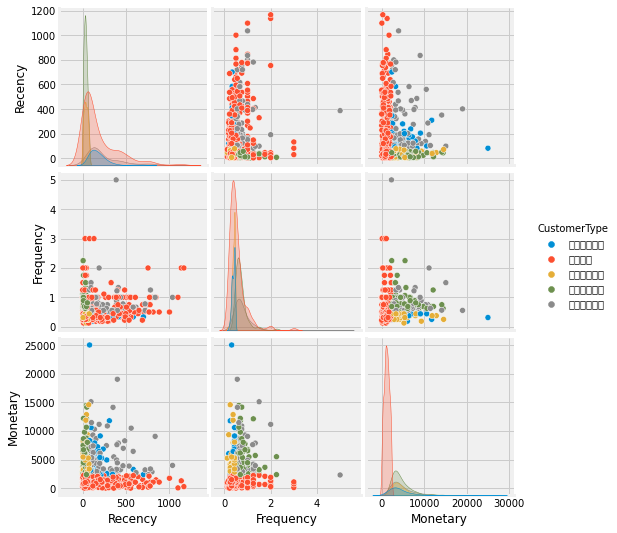

In [74]:
sns.pairplot(df_rfm,hue='CustomerType',x_vars=['Recency','Frequency','Monetary'],
            y_vars=['Recency','Frequency','Monetary'])

- 不同类型客户数量分布

In [84]:
from pyecharts.charts import Bar,Pie,Page,Grid
from pyecharts import options as opts
b1=(Bar()
   .add_xaxis(df_CustomerNum.CustomerType.tolist())
   .add_yaxis('客户数量',df_CustomerNum.CustomerNum.values.tolist())
   )
b1.render_notebook()


- 不同类型客户创利分析

In [106]:
p2=(Pie()
   .add('数量占比',[list(z) for z in zip(df_CustomerNum.CustomerType,df_CustomerNum.CustomerNum)],
       
       radius=['35%','50%'])
   .set_global_opts(title_opts=opts.TitleOpts(title='不同类型客户数量占比'),
                   legend_opts=opts.LegendOpts(pos_right='20%',pos_top='30%',orient='vertical'))
   .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter='{b}:{c} ({d}%)')))
p3=(Pie()
   .add('销售额占比',[list(z) for z in zip(df_Monetary.CustomerType,df_Monetary.Monetary)],
      
       radius=['35%','50%'])
   .set_global_opts(title_opts=opts.TitleOpts(title='不同类型客户销售额占比'),
                   legend_opts=opts.LegendOpts(pos_right='20%',pos_top='30%',orient='vertical'))
   .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter='{b}:{c} ({d}%)')))
p4=(Pie()
   .add('利润占比',[list(z) for z in zip(df_Monetary.CustomerType,df_Monetary.Profit)],
       
       radius=['35%','50%'])
   .set_global_opts(title_opts=opts.TitleOpts(title='不同类型客户利润占比'),
                   legend_opts=opts.LegendOpts(pos_right='20%',pos_top='30%',orient='vertical'))
   .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter='{b}:{c} ({d}%)')))
page=(Page()
     .add(p2,p3,p4))

page.render_notebook()

## 三.同期群分析
同期群分析（cohort Analysis）也称群组分析，其主要目的是分析相似群体的行为随时间的变化，比如用户商品的回购，对产品/服务的使用

1.主要包括俩种形式
- 初始行为:如首次使用App，成功注册或者第一次产生购买行为
- 留存行为:可以是用户的任何行为，如产生购买，使用App，分享等等
2.分析过程
- 通过将用户按初始行为的发生时间分组（得到同期群），然后再统计初始行为时间后不同时间段内的留存行为
3.作用和应用场合
- 同期群分析使我们能够观察处于生命周期不同阶段客户的行为，适用于营收，用户留存/流失，分享传播等我们关注的数据指标

### 3.1 每年分为上下两个半年作为周期


In [107]:
df2=df_1.copy()

In [108]:
#定义时间节点，作为每个周期的起始
time_nodes=pd.to_datetime(['2014-12-31','2015-06-30','2015-12-31','2016-06-30','2016-12-31','2017-06-30','2017-12-31','2018-06-30','2018-12-31'])
label=['2015H1','2015H2','2016H1','2016H2','2017H1','2017H2','2018H1','2018H2']
#保存每个周期内不同订单对应的客户ID，会有重复值
customer_list=[]
#保存每个周期内下过单的客户ID，没有重复值
u_customer_list=[]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         5003 non-null   int64         
 1   OrderID       5003 non-null   object        
 2   OrderDate     5003 non-null   datetime64[ns]
 3   ShipDate      5003 non-null   object        
 4   ShipMode      5003 non-null   object        
 5   CustomerID    5003 non-null   object        
 6   CustomerName  5003 non-null   object        
 7   Segment       5003 non-null   object        
 8   Country       5003 non-null   object        
 9   City          5003 non-null   object        
 10  State         5003 non-null   object        
 11  PostalCode    5003 non-null   float64       
 12  Region        5003 non-null   object        
 13  ProductID     5003 non-null   object        
 14  Category      5003 non-null   object        
 15  Sub-Category  5003 non-null   object  

### 3.2 获得不同时期内下单的客户ID

In [109]:
for i in range(8):
    customer_half_year=df2.loc[(df2.OrderDate>time_nodes[i])&(df2.OrderDate<=time_nodes[i+1])].CustomerID
    u_customer_half_year=list(set(customer_half_year))
    print(label[i]+'去重前下单客户数量', len(customer_half_year))
    print(label[i]+'去重后下单客户数量', len(u_customer_half_year))
    customer_list.extend(customer_half_year)
    u_customer_list.append(u_customer_half_year)

2015H1去重前下单客户数量 332
2015H1去重后下单客户数量 281
2015H2去重前下单客户数量 637
2015H2去重后下单客户数量 456
2016H1去重前下单客户数量 358
2016H1去重后下单客户数量 293
2016H2去重前下单客户数量 678
2016H2去重后下单客户数量 455
2017H1去重前下单客户数量 471
2017H1去重后下单客户数量 350
2017H2去重前下单客户数量 842
2017H2去重后下单客户数量 517
2018H1去重前下单客户数量 606
2018H1去重后下单客户数量 435
2018H2去重前下单客户数量 1079
2018H2去重后下单客户数量 593
